In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm 

In [2]:
merged_data = []
for i in range(34):
    with open(f'data/response{i}.json'.format(i=i)) as f:
        data = json.load(f)
    f.close()    
    

    merged_data += data['itemList']
    i += 1

In [3]:
stat = dict()
for i in range(len(merged_data)):
    username = merged_data[i]['author']['uniqueId']
    hashtags = merged_data[i]['challenges']
    tags = []
    
    if username not in stat:
        stat[username] = {'display_name' : merged_data[i]['author']['nickname'],
                          'user_stat' : merged_data[i]['authorStats'],
                          'pic' : merged_data[i]['author']['avatarMedium'],
                          'bio': merged_data[i]['author']['signature'],
                         'hashtags' : [],
                         'hashtags_num' : [],
                         'videos' : [merged_data[i]['stats']]}
        
    else:
        stat[username]['videos'].append(merged_data[i]['stats'])
    
    stat[username]['hashtags_num'].append(len(hashtags))
    for j in range(len(hashtags)):
        
        if hashtags[j]['title'] not in stat[username]["hashtags"]:
            stat[username]["hashtags"].append(hashtags[j]['title'])

stat

{'scarysherrydoll': {'display_name': 'Scary Sherry',
  'user_stat': {'diggCount': 20500,
   'followerCount': 75400,
   'followingCount': 861,
   'heart': 7400000,
   'heartCount': 7400000,
   'videoCount': 28},
  'pic': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/6c637d36f3e1aaf4d64bcbc462e945b2~c5_720x720.jpeg?x-expires=1678161600&x-signature=GxMU5tH%2Br62P1KzRCLr%2FN0Nk7HM%3D',
  'bio': '28 | Drag Queen | YYT | Canada 🌈 🌺\n\nSUPPORT MY DRAG SISTER! SHOP IN LINK BELOW',
  'hashtags': ['alphabetmafia🏳️\u200d🌈',
   'gay',
   'homevideo',
   'dragqueen',
   'birthday'],
  'hashtags_num': [5],
  'videos': [{'commentCount': 79900,
    'diggCount': 7400000,
    'playCount': 26900000,
    'shareCount': 85000}]},
 'sugarandspice': {'display_name': 'SUGAR & SPICE✨',
  'user_stat': {'diggCount': 6865,
   'followerCount': 7800000,
   'followingCount': 569,
   'heart': 172800000,
   'heartCount': 172800000,
   'videoCount': 680},
  'pic': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-a

In [4]:
# separate small accounts (followers between 1000 and 10000) and big accounts (followers more than 10000)
small_acts = []
big_acts = []
for name in stat.keys():
    followersCount = stat[name]['user_stat']['followerCount']
    if followersCount >= 1000 and followersCount <= 10000:
        small_acts.append(name)
    elif followersCount >= 10000:
        big_acts.append(name)

print(len(small_acts))
print(len(big_acts))

94
445


In [5]:
def get_val(name_list):
    hashtags = []
    engagements = []
    for name in name_list:
        hashtags += stat[name]['hashtags_num']
        videos = stat[name]['videos']
        engagement = []
        for i in range(len(videos)):
            engagement.append(stat[name]['videos'][i]['commentCount']+
                             stat[name]['videos'][i]['diggCount'] +
                             stat[name]['videos'][i]['playCount'] +
                             stat[name]['videos'][i]['shareCount'])

        engagements += engagement
        
    return hashtags, engagements

In [6]:
sm_h, sm_e = get_val(small_acts)
big_h, big_e = get_val(big_acts)
hashtags = sm_h + big_h
engagement = sm_e + big_e

In [7]:
1e6

1000000.0

In [8]:
type(engagement)

list

In [9]:
max(engagement)

49212700

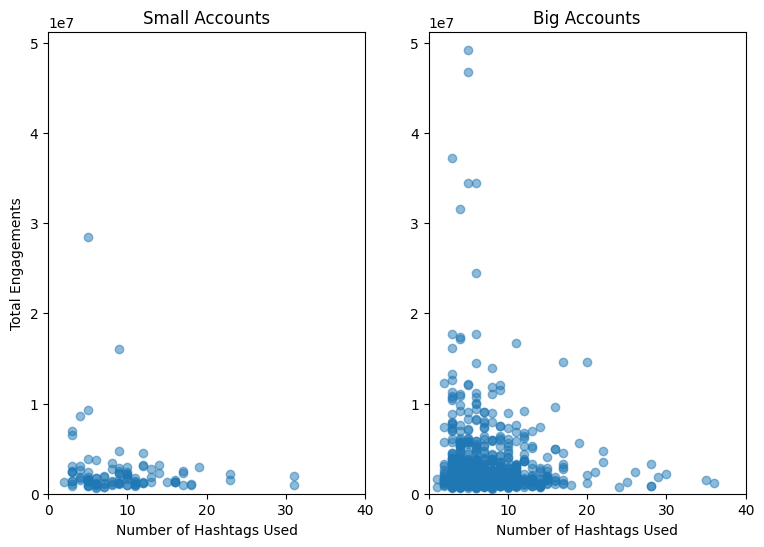

In [10]:
fig, (ax1,ax2) = plt.subplots(figsize = (9, 6), ncols = 2)


ax1.scatter(y=sm_e,x=sm_h, alpha = .5)
ax1.set_title("Small Accounts")
ax1.set_ylabel("Total Engagements")
ax1.set_xlabel("Number of Hashtags Used")

ax2.scatter(y=big_e,x=big_h, alpha = .5)
ax2.set_title("Big Accounts")
ax2.set_xlabel("Number of Hashtags Used")

custom_xlim = (0, 40)
custom_ylim = (0, max(engagement)+0.2e7)

plt.setp((ax1,ax2), xlim=custom_xlim, ylim=custom_ylim)

plt.savefig('comparison.jpg')

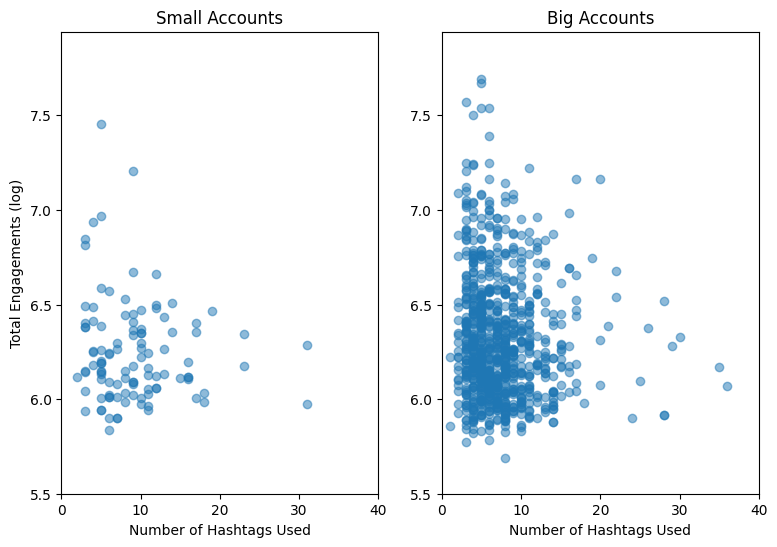

In [11]:
log_sm_e = np.log10(sm_e)
log_big_e = np.log10(big_e)
fig, (ax1,ax2) = plt.subplots(figsize = (9, 6), ncols = 2)


ax1.scatter(y=log_sm_e,x=sm_h, alpha = .5)
ax1.set_title("Small Accounts")
ax1.set_ylabel("Total Engagements (log)")
ax1.set_xlabel("Number of Hashtags Used")

ax2.scatter(y=log_big_e,x=big_h, alpha = .5)
ax2.set_title("Big Accounts")
ax2.set_xlabel("Number of Hashtags Used")

custom_xlim = (0, 40)
custom_ylim = (5.5, max(log_big_e)+.25)

plt.setp((ax1,ax2), xlim=custom_xlim, ylim=custom_ylim)

# fig.tight_layout()
# ax.set_yscale('log')

# plt.show()
plt.savefig('comparison_logy.jpg')

In [12]:
X, y = np.array(hashtags).reshape(-1,1), np.array(engagement).reshape(-1,1)
logy = np.log10(engagement)
# X.reshape(-1,1)

In [13]:
df = pd.DataFrame(np.append(X,y,1), columns = ['X','y'])
df['logy'] = np.log10(df['y'])
df

,X,y,logy
0,5,28498200,7.454817
1,5,9238023,6.965579
2,4,8610555,6.935031
3,5,3882732,6.589137
4,9,4721942,6.674121
...,...,...,...
949,8,1348609,6.129886
950,6,5863958,6.768191
951,11,2322983,6.366046
952,9,1799276,6.255098


In [14]:
# remove outlier
df = df.drop(727)

X = np.array(df['X']).reshape(-1,1)
logy = np.array(df['logy']).reshape(-1,1)
reg = lr().fit(X, logy)
print(reg.score(X, logy))

print(reg.coef_)
print(reg.intercept_)

0.009023047307354704
[[-0.00687393]]
[6.36820473]


In [49]:
# when single hashtag is used, expected engagement would be;
np.exp(6.36820473 - 0.00687393 * 1)

579.0163989174633

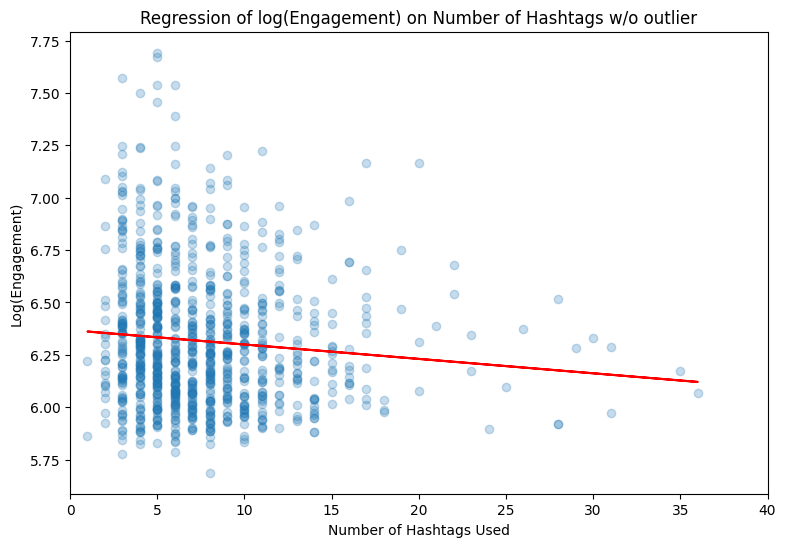

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df['X'],df['logy'],alpha=.25)

m, b = np.polyfit(np.array(df['X']), df['logy'], 1)

ax.plot(np.array(df['X']), m*np.array(df['X'])+b, color = 'r')
custom_xlim = (0, 40)
# custom_ylim = (0, max(logy))

ax.set_title('Regression of log(Engagement) on Number of Hashtags w/o outlier')
ax.set_ylabel('Log(Engagement)')
ax.set_xlabel('Number of Hashtags Used')

plt.setp(ax, xlim=custom_xlim)

# ax.set_yscale('log')
# plt.show()
plt.savefig('regression_remove_outlier.jpg')

In [17]:
def get_val(name_list, kind):
    if kind == 'hashtags':
        hashtags = []
        for name in name_list:
            hashtags += stat[name]['hashtags_num']
        
        return hashtags
    else:
        if kind not in ['commentCount','diggCount','playCount','shareCount']:
            print("Please enter any of these: 'commentCount','diggCount','playCount','shareCount'.")
        
        engagements = []
        for name in name_list:
            videos = stat[name]['videos']
            engagement = []
            for i in range(len(videos)):
                engagement.append(stat[name]['videos'][i][kind])

            engagements += engagement
        return engagements
#     return hashtags, engagements

In [18]:
accounts = small_acts
pd.DataFrame({
    'hashtags' : get_val(accounts, 'hashtags'),
    'commentCount' : get_val(accounts, 'commentCount'),
    'diggCount' : get_val(accounts, 'diggCount'),
    'playCount': get_val(accounts, 'playCount'),
    'shareCount' : get_val(accounts, 'shareCount')
})

,hashtags,commentCount,diggCount,playCount,shareCount
0,5,23000,2900000,25500000,75200
1,5,6323,1500000,7700000,31700
2,4,925,707500,7900000,2130
3,5,7332,643900,3200000,31500
4,9,1463,619000,4100000,1479
...,...,...,...,...,...
101,10,862,150300,2200000,2673
102,8,3412,148000,818000,1281
103,8,2123,460300,2300000,9764
104,3,21600,360100,6000000,120100


In [19]:
accounts = stat.keys()
all_df = pd.DataFrame({
    'hashtags' : get_val(accounts, 'hashtags'),
    'comments' : get_val(accounts, 'commentCount'),
    'likes' : get_val(accounts, 'diggCount'),
    'plays': get_val(accounts, 'playCount'),
    'shares' : get_val(accounts, 'shareCount')
})
all_df['total_engagement'] = all_df[['comments','likes','plays','shares']].sum(axis=1)
all_df[all_df['hashtags']== max(all_df['hashtags'])]
all_df = all_df.drop(667)
all_df

,hashtags,comments,likes,plays,shares,total_engagement
0,5,79900,7400000,26900000,85000,34464900
1,6,23900,3700000,20700000,25000,24448900
2,6,11000,2100000,7900000,11600,10022600
3,3,25400,1700000,7100000,13100,8838500
4,4,8325,1600000,7600000,12100,9220425
...,...,...,...,...,...,...
954,8,2123,460300,2300000,9764,2772187
955,3,21600,360100,6000000,120100,6501800
956,9,2876,172900,1600000,23500,1799276
957,5,1770,167900,1200000,278,1369948


In [20]:
y = all_df['total_engagement']
X = all_df['hashtags']

In [21]:
X = sm.add_constant(X) 
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:       total_engagement   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.161
Date:                Sun, 05 Mar 2023   Prob (F-statistic):            0.00437
Time:                        11:38:25   Log-Likelihood:                -15926.
No. Observations:                 958   AIC:                         3.186e+04
Df Residuals:                     956   BIC:                         3.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.593e+06   2.57e+05     13.975      0.0

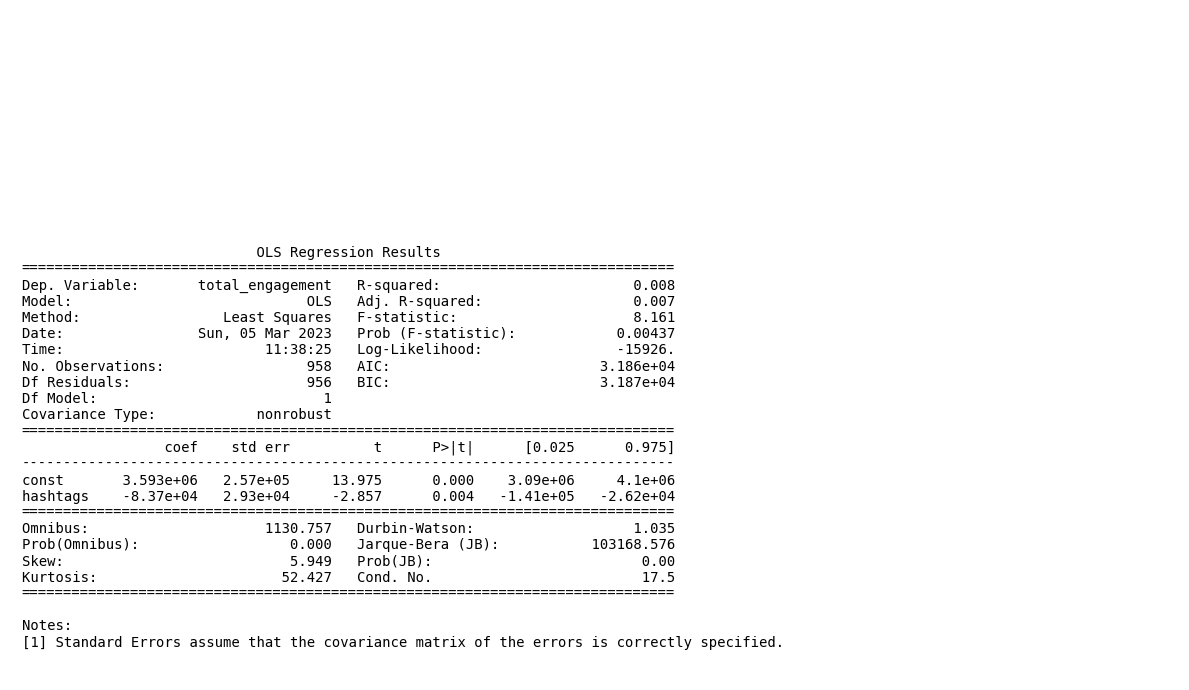

In [22]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(est.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('ols.png')

In [23]:
small_acts_stat = []
for name in small_acts:
    temp_dict = dict()
    temp_dict['display_name'] = stat[name]['display_name']    
    temp_dict['username'] = name
    temp_dict['bio'] = stat[name]['bio']
    temp_dict['pic'] = stat[name]['pic']
#     print(len(stat[name]['videos']))
    temp_dict['videos_with_#dragqueen'] = len(stat[name]['videos'])
    small_acts_stat.append(temp_dict)

small_acts_stat

[{'display_name': 'Gee',
  'username': 'georgiaatkinss',
  'bio': 'Gee',
  'pic': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/eca34060e76b7c6cb61ff01629ceda31~c5_720x720.jpeg?x-expires=1678161600&x-signature=sQOIVmIN3GkmvHHNwUYr8UkroSw%3D',
  'videos_with_#dragqueen': 1},
 {'display_name': 'Josie Olson',
  'username': 'minnesotadrag',
  'bio': 'Minnesota Drag Events',
  'pic': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/20eb6d67635057746414ca46deb17fcd~c5_720x720.jpeg?x-expires=1678161600&x-signature=zBNlgQXjLDH6rBdjupWEMPGOyx4%3D',
  'videos_with_#dragqueen': 1},
 {'display_name': 'Gary Stubbs',
  'username': 'garystubbs89',
  'bio': 'Drag fan!!',
  'pic': 'https://p16-sign-va.tiktokcdn.com/musically-maliva-obj/1664498470736901~c5_720x720.jpeg?x-expires=1678161600&x-signature=yVQy1%2FM4FAECErwfvwO7cpMArHs%3D',
  'videos_with_#dragqueen': 1},
 {'display_name': 'Jillian Tozer',
  'username': 'jetozer19',
  'bio': '📍NJ🇺🇸\n23\nSmile while you still have teeth\nVenmo:

In [24]:
with open('small_accounts.json', 'w') as f:
    f.write(json.dumps(small_acts_stat, indent=2))
    
f.close()